# **Extracting information from the Zip File**

In [ ]:
import zipfile
import numpy as np
zip_ref = zipfile.ZipFile("/content/CSTR data files (1).zip", 'r')
zip_ref.extractall("/content/sample_data")
zip_ref.close()

# **Reading the information using the scipy **

In [ ]:
import scipy.io
Tr_attack = scipy.io.loadmat('/content/sample_data/CSTR_train_attack.mat') 
Tr_noise = scipy.io.loadmat('/content/sample_data/CSTR_train_noise.mat')
Tr_normal = scipy.io.loadmat('/content/sample_data/CSTR_train_normal.mat')
Te_attack = scipy.io.loadmat('/content/sample_data/CSTR_test_attack.mat') 
Te_noise = scipy.io.loadmat('/content/sample_data/CSTR_test_noise.mat')
Te_normal = scipy.io.loadmat('/content/sample_data/CSTR_test_normal.mat')

In [ ]:
Train_attack = Tr_attack['CSTR_train_attack']
Train_noise = Tr_noise['CSTR_train_noise']
Train_Normal = Tr_normal['CSTR_train_normal']
Test_attack = Te_attack['CSTR_test_attack']
Test_noise = Te_noise['CSTR_test_noise']
Test_Normal = Te_normal['CSTR_test_normal']

# **Checking the shape of extratced training and testing**

In [ ]:
print("The size of the training dataset for Attack",Train_attack.shape)
print("The size of the training dataset for Noise",Train_noise.shape)
print("The size of the training dataset for Normal",Train_Normal.shape)
print("The size of the testing dataset for Attack",Test_attack.shape)
print("The size of the testing dataset for Noise",Test_noise.shape)
print("The size of the testing dataset for Normal",Test_Normal.shape)

The size of the training dataset for Attack (694, 201)
The size of the training dataset for Noise (694, 201)
The size of the training dataset for Normal (694, 201)
The size of the testing dataset for Attack (15, 201)
The size of the testing dataset for Noise (15, 201)
The size of the testing dataset for Normal (15, 201)


# **Combining Training information**

In [ ]:
Combined_training = []
for x in Train_attack[:,:-1]:
  Combined_training.append(x)
for x in Train_noise[:,:-1]:
  Combined_training.append(x)
for x in Train_Normal[:,:-1]:
  Combined_training.append(x)  

In [ ]:
Combined_training =np.array(Combined_training)
print("The combined training set",Combined_training.shape)

The combined training set (2082, 200)


In [ ]:
Training_target = []
for x in Train_attack[:,-1]:
  Training_target.append(x)
for x in Train_noise[:,-1]:
  Training_target.append(x)
for x in Train_Normal[:,-1]:
  Training_target.append(x)  

In [ ]:
Training_target = np.array(Training_target)
print("The combined target training set",Training_target.shape)

The combined target training set (2082,)


# **Combining Testing information**

In [ ]:
Combined_testing = []
for x in Test_attack[:,:-1]:
  Combined_testing.append(x)
for x in Test_noise[:,:-1]:
  Combined_testing.append(x)
for x in Test_Normal[:,:-1]:
  Combined_testing.append(x) 

In [ ]:
Combined_testing = np.array(Combined_testing)
print("The combined target testing set",Combined_testing.shape)

The combined target testing set (45, 200)


In [ ]:
Target_testing = []
for x in Test_attack[:,-1]:
  Target_testing.append(x)
for x in Test_noise[:,-1]:
  Target_testing.append(x)
for x in Test_Normal[:,-1]:
  Target_testing.append(x) 

In [ ]:
Target_testing = np.array(Target_testing)
print("The combined target testing set",Target_testing.shape)

The combined target testing set (45,)


# **Creating an One Hot Encoder for the Traget**

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
target_total_train = enc.fit_transform(Training_target.reshape(-1,1))
target_total_train = np.array(target_total_train)
target_total_test = enc.fit_transform(Target_testing.reshape(-1,1))
target_total_test = np.array(target_total_test)
print("Total Testing size: ",target_total_test.shape)
print("Total Training size: ",target_total_train.shape)

Total Testing size:  (45, 3)
Total Training size:  (2082, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Defining The model**

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 3)                 78        
                                                                 
Total params: 26,503
Trainable params: 26,503
Non-trainable params: 0
_________________________________________________________________


# **Training model**

In [ ]:
from keras import losses
#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=True),
metrics=["accuracy"])
hist = model.fit(Combined_training, target_total_train,epochs=1000, steps_per_epoch=2,validation_steps=2,validation_data = (Combined_testing,target_total_test))

Epoch 1/1000
2/2 [==============================] - 1s 294ms/step - loss: 44.2880 - accuracy: 0.2954 - val_loss: 96.4481 - val_accuracy: 0.2222
Epoch 2/1000
2/2 [==============================] - 0s 51ms/step - loss: 42.9679 - accuracy: 0.2959 - val_loss: 95.7351 - val_accuracy: 0.2222
Epoch 3/1000
2/2 [==============================] - 0s 45ms/step - loss: 41.6120 - accuracy: 0.2963 - val_loss: 95.0060 - val_accuracy: 0.2222
Epoch 4/1000
2/2 [==============================] - 0s 44ms/step - loss: 40.2996 - accuracy: 0.2968 - val_loss: 94.2809 - val_accuracy: 0.2222
Epoch 5/1000
2/2 [==============================] - 0s 50ms/step - loss: 38.9710 - accuracy: 0.2973 - val_loss: 93.5442 - val_accuracy: 0.2222
Epoch 6/1000
2/2 [==============================] - 0s 59ms/step - loss: 37.6364 - accuracy: 0.2973 - val_loss: 92.8227 - val_accuracy: 0.2444
Epoch 7/1000
2/2 [==============================] - 0s 70ms/step - loss: 36.3303 - accuracy: 0.2973 - val_loss: 92.1229 - val_accuracy: 0.244

# **Checking the training and testing accuracies**

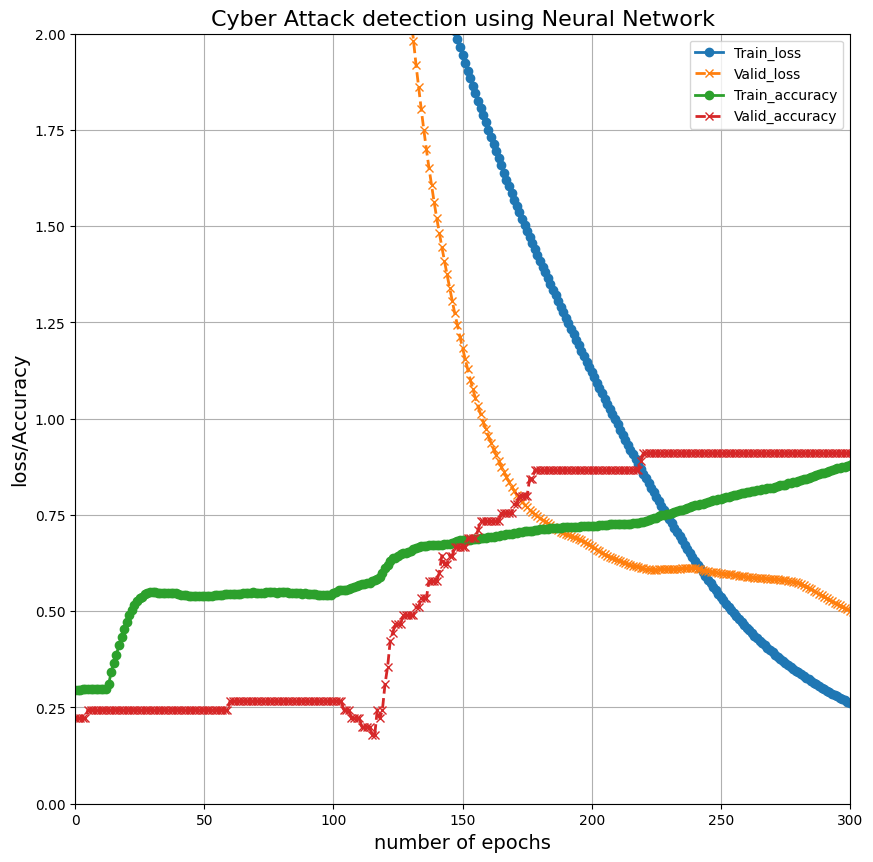

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(hist.history['loss'],label ="Train_loss",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_loss'],label ="Valid_loss",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.plot(hist.history['accuracy'],label ="Train_accuracy",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_accuracy'],label ="Valid_accuracy",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.gca().set_xlim(0, 300)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('loss/Accuracy', fontsize=14)
plt.title('Cyber Attack detection using Neural Network',fontsize=16)
plt.legend()
plt.grid(True)

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(Combined_training, target_total_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(Combined_testing, target_total_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9937559962272644
Testing Accuracy:  0.9777777791023254
